---
---
Option pricing using Monte-carlo simulations
---
---
---

#Plan

*   [Introduction](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=zSVJjpWPR_Wl)
* [Monte-Carlo simulations](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=Kir5RH0EvrlQ)
  * [Some basic concepts](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=GnuwgSHxv31K)
    * Sampling
    * Mean estimation
    * Law of large numbers
    * Central limit theorem
    * Confidence interval estimation
  * [Monte-Carlo method](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=wdSCbT65xyBG)
    * The principle
    * Error analysis
  * [ Example : The value of π estimation](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=RdRzq7dby4LE)
  * Pros
  * Cons
* [Simulation of random vectors and stochastic processes](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=9BYLxkUmzcoB)
  * Random variables
    * Multivariate Normal Distribution
    * Correlated Random Variables
  * Stochastic Processes
    * Wiener Process (Brownian Motion)
    * Geometric Brownian Motion (GBM)
    * Poisson Process
    * Ornstein-Uhlenbeck Process

  * Simulation techniques
    * Random variable of uniform distribution on [0,1]
    * Inverse method
    * Transformation method
    * Reject method
    * Simulation of Gaussian vector
    * Simulation of Brownian motion
* [Variance reduction techniques](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=iaDd9UHe0T4L)
  * The priciple
  * Antithetic Variates
  * Control Variates
  * Importance sampling
  * Stratified Sampling
  * Common Random Numbers (CRN)

* [Stochastic gradient](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=qyTmBq4t05Cd)
  * The priciple
  * The algorithm
  * Advantages and Limitations of SGD
* [Option contract](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=EUrrCKO0Wb5e)
  * Types
  * Components
  * Purpse
  * Categories
* Practice application : European option pricing
  * Call option
  * Put option
* [Results analysis](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=MDqrd8gU2X3S)
* [Conclusion](https://colab.research.google.com/drive/1zb9GyevxPJietyFv0yhlZqbEOoyHPByc#scrollTo=qZuXzw0G2c4K)




#Introduction

To hedge against a market movement that could be unfavorable, an investor can buy a call option on the securities they wish to acquire and a put option on the securities they intend to sell in the future.

To assess the price of the option (call, put), which depends on the future values of the underlying asset, it is first necessary to model the evolution of the latter and then be able to estimate the option price.

In order to achieve a high-quality estimates for european options prices with reduced simulation errors, we opt to use Monte-carlo simulations to simulate underlying asset price susing the Geometric Brownian Motion model.

To enhance the precision of the estimates we want to reduce the variance of Monte-carlo estimators, that is why we are going to use some variance reduction techniques such as Antithetic Variates, Control Variates, and Importance sampling.

Finally to optimize the model parameters by improving the convergence rate and accuracy, we are going to use a stochastic gradient algorithm.

#Monte-Carlo simulations


##Some basic concepts

###Sampling


Sampling is a process by which a sample of the population is selected to study the characteristics of an entire population. It is therefore essential to carefully choose the sample so that it faithfully represents the target population (a representative sample). Sampling is mainly conducted when the population is infinite, for cost-saving reasons, or to obtain information as quickly as possible.

Mathematically, an n-sample of distribution $P$ is the set $X_{1}, \ldots, X_{n}$ of $n$ independent and identically distributed random variables according to $P$.
In other words,
$$
\forall i \in\{1, \ldots, n\} X_{i} \sim P \quad \text { et } \quad \forall i \neq j \quad X_{i} \text { and } X_{j} \text { are independent. }
$$

###Mean estimation

Based on an $n$-sample from distribution $P_{\theta}$, the purpose of estimation is to estimate the parameter $Θ$ of the distribution $P$.
Let $X_{1}, \ldots, X_{n}$ a n-sample from $P$ such that

 $\forall i \quad \mathbb{E}\left\{X_{i}\right\}=\mu$ and  $\operatorname{Var}\left\{X_{i}\right\}=\sigma^{2}<+\infty .$

We define the quantity
$
\bar{X}_{n}=\frac{1}{n} \sum_{i=1}^{n} X_{i}
$
as the empirical mean.


###Law of large numbers(LLN)

The **Law of Large Numbers (LLN)** is a fundamental theorem in probability and statistics that describes the behavior of the average (or sample mean) of a large number of independent, identically distributed random variables. It essentially tells us that as the sample size grows, the sample mean will tend to get closer and closer to the expected value (or population mean) of the underlying random variable.

####Strong Law of Large Numbers(SLLN)

The **Strong Law of Large Numbers (SLLN)** states that the sample average of a sequence of independent and identically distributed (i.i.d.) random variables converges almost surely to the expected value of those variables as the sample size grows to infinity.




Formally, let $ X_1, X_2, \dots, X_n $ be i.i.d. random variables with finite expected value $ \mathbb{E}[X_i] = \mu $. The Strong Law of Large Numbers can be written as:

$$
\mathbb{P}\left(\lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^{n} X_i = \mu\right) = 1
$$


This formula states that, as $n \to \infty $, the probability that the sample mean $ \frac{1}{n} \sum_{i=1}^{n} X_i $ converges to the expected value $ \mu $ is equal to 1. In other words, the sample mean converges almost surely to the true mean $ \mu $, meaning that with enough observations, the average of the sample will match the population mean with probability 1.


#### Weak law of large numbers

The **Weak Law of Large Numbers (WLLN)** states that the sample average of a sequence of independent and identically distributed (i.i.d.) random variables converges in probability to the expected value as the sample size increases.

Formally, let $X_1, X_2, \dots, X_n $ be i.i.d. random variables with finite expected value $\mathbb{E}[X_i] = \mu $. The Weak Law of Large Numbers can be written as:

$$
\forall \epsilon > 0, \quad \lim_{n \to \infty} \mathbb{P}\left(\left| \frac{1}{n} \sum_{i=1}^{n} X_i - \mu \right| > \epsilon \right) = 0
$$

This formula states that, for any arbitrarily small positive number $ \epsilon $, the probability that the sample mean $ \frac{1}{n} \sum_{i=1}^{n} X_i $ deviates from the true mean $ \mu $ by more than $ \epsilon $ approaches zero as $ n \to \infty $. This convergence in probability implies that the sample mean becomes close to the true mean with high probability when $ n $ is large.

###Central limit theorem(CLT)

The **Central Limit Theorem (CLT)** is one of the most important results in probability theory and statistics. It describes the shape of the distribution of the sum (or average) of a large number of independent, identically distributed random variables, regardless of the original distribution of the variables.


The **CLT** states that if you have a large enough sample of independent, identically distributed random variables with any distribution (with finite mean $ \mu $ and variance $ \sigma^2 $), the distribution of the sample mean will approach a normal distribution as the sample size increases.



Formally, let $ X_1, X_2, \dots, X_n \$ be i.i.d. random variables with:

$$
\mathbb{E}[X_i] = \mu \quad \text{and} \quad \text{Var}(X_i) = \sigma^2
$$

Then, the distribution of the sample mean $ \overline{X_n} = \cfrac{1}{n} \sum_{i=1}^{n} X_i $ will tend to a normal distribution with mean $ \mu $ and variance $ \cfrac{\sigma^2}{n} $ as $ n \to \infty $:

$$
\frac{\overline{X_n} - \mu}{\sigma / \sqrt{n}} \xrightarrow{d} N(0,1)
$$

This means that the sample mean will approach a normal distribution with mean $ \mu $ and standard deviation $ \cfrac{\sigma}{\sqrt{n}} $ as $ n $ increases.


###Confidence interval estimation

**Confidence Interval Estimation** is a key concept in statistics that allows you to estimate a range (interval) of values within which the true population parameter is likely to fall, based on a sample from the population. This interval is constructed from sample data and is associated with a certain confidence level, which reflects the degree of certainty we have that the interval contains the true parameter.

The confidence interval is an interval estimate of a population parameter that gives a range of values within which the true parameter is likely to fall. The interval is associated with a confidence level, which indicates the probability that the interval contains the true parameter.

The general formula for the confidence interval for the population mean $ \mu $ is:

$$
\overline{X} \pm Z_{\alpha/2} \frac{s}{\sqrt{n}}
$$

Where:
* $ \overline{X} $ is the sample mean.
* $ s $ is the sample standard deviation.
*    $ n $ is the sample size.
*    $ Z_{\alpha/2} $ is the critical value from the standard normal distribution.
*    $ \alpha $ is the significance level.



If the population standard deviation $\sigma$ is known, the formula becomes:

$$
\overline{X} \pm Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}
$$


If $ \sigma $ is unknown, the formula uses the $ t $-distribution instead of the normal distribution:

$$
\overline{X} \pm t_{\alpha/2, n-1} \frac{s}{\sqrt{n}}
$$


For proportions, the confidence interval is given by:

$$
\hat{p} \pm Z_{\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

Where $ \hat{p} $ is the sample proportion and $ n $ is the sample size.

##Monte-Carlo method

###The principle

The Monte Carlo Method is a technique that uses random sampling to obtain numerical results for problems that might be deterministic in principle. It is particularly useful for problems where analytical solutions are complex or unknown.

The general approach is as follows:

1. Define the problem and generate random inputs.
2. Simulate the system or evaluate the function with these random inputs.
3. Average the results to estimate the desired quantity.

For integration, the Monte Carlo approximation is given by:

$$
I \approx \frac{b - a}{N} \sum_{i=1}^{N} f(x_i)
$$

Where $N $ is the number of random samples, and $ x_i $ are random points in the interval $[a, b] $.



###Error analysis

Monte Carlo simulations introduce statistical error due to random sampling, and the analysis of this error is essential for understanding the accuracy of the estimate.

1. Standard Error:

   For a Monte Carlo estimate, the standard error \( SE \) quantifies the variability due to randomness and is given by:
   $$
   SE \approx \frac{\sigma}{\sqrt{N}}
   $$
   where $ \sigma $ is the population standard deviation and $ N $ is the number of samples.

2. Root Mean Square Error (RMSE):

   The root mean square error approximates the standard error for large sample sizes:
   $$
   \text{RMSE} \approx \frac{\sigma}{\sqrt{N}}
   $$


3. Bias:

   Monte Carlo estimators are typically unbiased for expectations, with any bias due to small-sample effects being negligible.

4. Variance Reduction Techniques:

   Techniques such as antithetic variates, control variates, and importance sampling can reduce the variance, thereby improving accuracy without increasing $ N $.

5. Confidence Intervals:

   A confidence interval for a Monte Carlo estimate $ \hat{\mu} $ is given by:
   $$
   \hat{\mu} \pm Z_{\alpha/2} \frac{\sigma}{\sqrt{N}}
   $$
   where $ Z_{\alpha/2} $ is the critical value (e.g., 1.96 for 95\%).


This analysis highlights that while the error decreases as \( \frac{1}{\sqrt{N}} \), achieving high accuracy requires a large number of samples.

##Example using Python : The value of π estimation

To estimate the value of $ \pi $, we will randomly throw darts inside a square $ OCBA $ with a side length of 1, as shown in the fllowing figure.


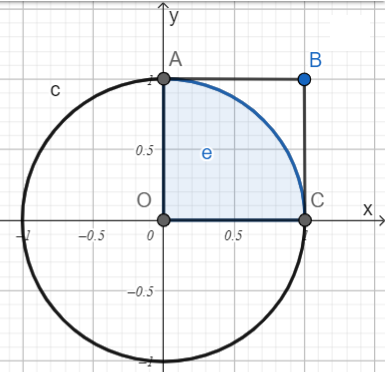

Let $ A_s $ be the area of the square and $ e $ the area of the quarter circle inscribed in this square. The probability $ p $ that a randomly thrown dart lands inside the quarter circle is given by:

$$
p = \frac{e}{A_s} = \frac{\pi}{4}
$$

To approximate $ \pi $, we just need an approximate value of $ p $.


### Simulation Steps

* Throw Darts:

 Suppose we throw $ n $ darts randomly inside the square.


* Count the Darts in the Quarter Circle:

  Let $ C $ represent the number of darts that land within the quarter circle.

  Then, the probability $ p $ can be approximated by:
   
$$
p \approx \frac{C}{n}
$$

* Estimate $ \pi $:

  Rearranging the equation for $ p $, we get:

  $$
  \pi \approx 4 \cdot \frac{C}{n}
  $$

### Simulation Method

To simulate the dart throws, we proceed as follows:

* Generate Random Variables $ X $ and $ Y $ independently following a uniform distribution on the interval $[0,1]$.


* Check if the Dart is in the Quarter Circle:

  If $$ D = \sqrt{X^2 + Y^2} \leq 1 $$
   then the dart is in the quarter circle, and we increment $ C $.


Thus, using this method, we obtain an approximate value of $ \pi $:

$$
\pi \approx 4 \cdot \frac{C}{n}
$$

This simulation gives a more accurate estimate of $ \pi $ as the number of darts (simulations) $ n $ increases.

### Python code

In [ ]:
import numpy as np
import time
def estimate_pi(num_points):
    # Generate random points in the unit square
    x = np.random.rand(num_points)
    y = np.random.rand(num_points)

    # Check if points are inside the quarter circle
    inside_circle = (x**2 + y**2) <= 1

    # Calculate the ratio of points inside the circle to total points
    pi_estimate = 4 * np.sum(inside_circle) / num_points
    return pi_estimate

# Run the estimation with a large number of points
num_points = 10000000
pi_approximation = estimate_pi(num_points)

print(f"Estimated value of pi: {pi_approximation}")


Estimated value of pi: 3.1415768


## Pros

1. Simplicity and Flexibility:

  * Monte Carlo methods are relatively straightforward to implement and can be applied to a broad range of problems. They do not require complex mathematical formulas and work with systems that may be otherwise analytically intractable.

2. Versatility:

  * They are highly adaptable and can handle high-dimensional spaces, non-linear systems, and complex probability distributions. This makes Monte Carlo ideal for applications across fields such as physics, finance, engineering, and computational biology.
3. Useful in Uncertainty Analysis:

  * Monte Carlo simulations are well-suited for estimating and quantifying uncertainty in complex models. They provide probabilistic results, allowing researchers to generate confidence intervals and quantify the variability around an estimate.
4. Scalability with Computational Power:

  * With increased computational resources, Monte Carlo simulations can achieve high accuracy, as running more simulations improves the reliability of the estimate. They can be parallelized effectively on modern hardware, especially when using cloud computing resources.

5. Applicability to Various Types of Problems:

  * Monte Carlo methods can be applied to solve various types of problems, including optimization, numerical integration, differential equations, and statistical sampling.

## Cons

1. High Computational Cost:

  * Monte Carlo simulations can be computationally intensive, particularly for problems requiring high accuracy. Large sample sizes are often necessary to achieve reliable estimates, which can demand significant time and computational resources.

2. Slow Convergence:

  * The error in Monte Carlo estimation decreases slowly with the sample size (i.e., the error rate is  $SE \approx \frac{\sigma}{\sqrt{N}}$. Achieving a substantial improvement in accuracy requires a large increase in the number of samples, which may be impractical.

3. Sensitivity to Randomness:

  * The results can vary due to the inherent randomness of the method, especially when the sample size is small. Poorly designed random number generators or low-quality random samples can introduce bias and reduce the accuracy of the simulation.

4. Requires Careful Design of Random Variables:

  * For complex problems, accurately modeling the underlying random variables and probability distributions can be challenging. An improper specification of the distribution or correlation between variables can lead to inaccurate or misleading results.

5. Limited Applicability for Some Deterministic Problems:

  * For certain problems that have deterministic analytical solutions (e.g., simple integrals), Monte Carlo methods may be inefficient or unnecessary, as they can take significantly longer than direct calculation methods.

6. Difficulty in Handling Rare Events:

  * Monte Carlo methods can struggle with problems involving rare events or extreme tail outcomes, as these events may require a large number of samples to capture accurately.


#Simulation of random vectors and stochastic processes



## Random vectors

A random vector is a vector of random variables, often used to model multivariate distributions. When simulating random vectors, the goal is to generate samples from a given multivariate distribution with a specific mean vector, covariance matrix, or dependence structure.



### Multivariate Normal Distribution



  Given a mean vector $ \mu $ and covariance matrix $ \Sigma $, a random vector $ X $ follows a multivariate normal distribution if:
$$
X \sim \mathcal{N}(\mu, \Sigma)
$$


### Correlated Random Variables



  For random vectors with correlated components, you can use a copula to create dependence structures among marginal distributions. The copula allows for simulating random variables from different distributions while maintaining a specified correlation structure.

##Stochastic Processes



A stochastic process is a collection of random variables indexed over time, used to model systems that evolve randomly over time. Simulating these processes often involves generating time series data under a specific model.

###Wiener Process (Brownian Motion)



  A Wiener process $ W(t) $ is a continuous-time stochastic process with independent, normally distributed increments and variance proportional to time.
  
With time step $ \Delta t $ it  has increments:
$$
W(t + \Delta t) = W(t) + \sqrt{\Delta t} \cdot Z
$$
where $ Z \sim \mathcal{N}(0, 1) $.


### Geometric Brownian Motion (GBM)



  Used to model stock prices, the GBM process $ S(t) $ has:
$$
dS(t) = \mu S(t) \, dt + \sigma S(t) \, dW(t)
$$
Discretized as:
$$
S(t + \Delta t) = S(t) \cdot \exp \left( (\mu - \frac{\sigma^2}{2}) \Delta t + \sigma \sqrt{\Delta t} \cdot Z \right)
$$



### Poisson Process

The Poisson process is used to model events occurring at a constant average rate over time.

  The Poisson process models events at a rate $ \lambda $. The number of events in time $ T $ can be simulated using exponentially distributed inter-arrival times with mean $ \frac{1}{\lambda} $.



### Ornstein-Uhlenbeck Process



  A mean-reverting process $ X(t) $ with:
$$
dX(t) = \theta (\mu - X(t)) \, dt + \sigma \, dW(t)
$$
Discretized as:
$$
X(t + \Delta t) = X(t) + \theta (\mu - X(t)) \Delta t + \sigma \sqrt{\Delta t} \cdot Z
$$
where $ Z \sim \mathcal{N}(0, 1) $ and $θ$ is the speed of mean reversion.


## Simulation techniques



In this context, we discuss various methods for simulating random vectors and stochastic processes. These techniques are essential for generating samples that follow specific distributions or processes, allowing us to model and analyze complex systems.

> Simulation of random vectors and stochastic processes is essential for modeling complex systems that evolve over time.



###Random variable of uniform distribution on [0,1]

A uniform random variable on $[0,1]$ is denoted as :
$$ U \sim \text{Uniform}(0,1) $$

It forms the basis for generating samples from other distributions.


In [ ]:
import numpy as np

# Generate a single random value from Uniform(0,1)
u_single = np.random.uniform(0, 1)

# Generate an array of random values from Uniform(0,1)
n = 1000  # Sample size
u_samples = np.random.uniform(0, 1, n)


###Inverse method

The inverse transform method is a technique used to generate a random sample $ X $ from a known  CDF $ F(x) $:

* Generate $ U \sim \text{Uniform}(0,1) $.
* Set $ X = F^{-1}(U) $.

For example, for an exponential distribution with rate $ \lambda $:
$$
X = -\frac{1}{\lambda} \ln(U)
$$

In [ ]:
# Set the rate parameter for exponential distribution
lambda_param = 1.5

# Inverse transform method
exp_samples = -np.log(u_samples) / lambda_param


###Transformation method

The transformation method generates samples from a desired distribution by applying a specific transformation to variables from known distributions. This is often used for simulating multivariate distributions or specific processes.

For example, the Box-Muller transform generates normal variables:
$$
Z_1 = \sqrt{-2 \ln(U_1)} \cos(2 \pi U_2)
$$
$$
Z_2 = \sqrt{-2 \ln(U_1)} \sin(2 \pi U_2)
$$

In [ ]:
# Generate two sets of uniform samples
u1 = np.random.uniform(0, 1, n)
u2 = np.random.uniform(0, 1, n)

# Apply Box-Muller transformation
z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

# z1 and z2 are independent standard normal variables


### Reject method

The rejection sampling method is used to simulate samples from a target distribution with density $f(x)$ when direct sampling is difficult.

 It requires an auxiliary distribution
$g(x)$ that bounds $f(x)$ and is easier to sample from :
* Generate $Y \sim g(x) $.
* Generate $ U \sim \text{Uniform}(0,1) $.
* Accept $ Y $ if $ U \leq \frac{f(Y)}{M .g(Y)} $.
Where $M$ is constant such that $f(x) \leq M.g(x)$ for all x.


In [ ]:
# Define the target density f(x) and the proposal density g(x)
def target_density(x):
    return 2 * (1 - x) if 0 <= x <= 1 else 0

def proposal_density(x):
    return 1 if 0 <= x <= 1 else 0

# Set the constant M such that M * g(x) >= f(x)
M = 2

# Rejection sampling
samples = []
while len(samples) < n:
    y = np.random.uniform(0, 1)  # Sample from g(x)
    u = np.random.uniform(0, 1)  # Uniform random variable for acceptance
    if u <= target_density(y) / (M * proposal_density(y)):
        samples.append(y)


###Simulation of Gaussian vector


Given mean vector $ \mu $ and covariance matrix $ \Sigma $:

* Decompose $ \Sigma = LL^T $.
* Generate $ Z \sim \mathcal{N}(0, I) $.
* Transform as $ X = \mu + LZ $. To obtain $ X \sim \mathcal{N}(\mu, \Sigma) $.


In [ ]:
# Define mean vector and covariance matrix
mu = np.array([1, 2])
Sigma = np.array([[1, 0.5], [0.5, 2]])

# Cholesky decomposition of the covariance matrix
L = np.linalg.cholesky(Sigma)

# Generate standard normal random vector
z = np.random.normal(size=(n, 2))

# Apply transformation to get Gaussian samples with desired mean and covariance
X = mu + z @ L.T

###Simulation of Brownian motion

 Brownian motion, or Wiener process is a continuous-time stochastic process with independent, normally distributed increments.

To simulate Brownian motion $ W(t) $ over $ [0, T] $:
* Divide $ [0, T] $ into $ n $ intervals of width $ \Delta t = \frac{T}{n} $.
* Generate $$ \Delta W_i \sim \mathcal{N}(0, \Delta t) $$.
* Construct the path:
    $$
    W(t_{i+1}) = W(t_i) + \Delta W_i
    $$


In [ ]:
T = 1        # End time
n_steps = 1000  # Number of steps
dt = T / n_steps

# Generate Brownian increments
dW = np.random.normal(0, np.sqrt(dt), n_steps)

# Simulate Brownian path by cumulative sum
W = np.cumsum(dW)
W = np.insert(W, 0, 0)  # Start at W(0) = 0

# Time array for plotting
time = np.linspace(0, T, n_steps + 1)


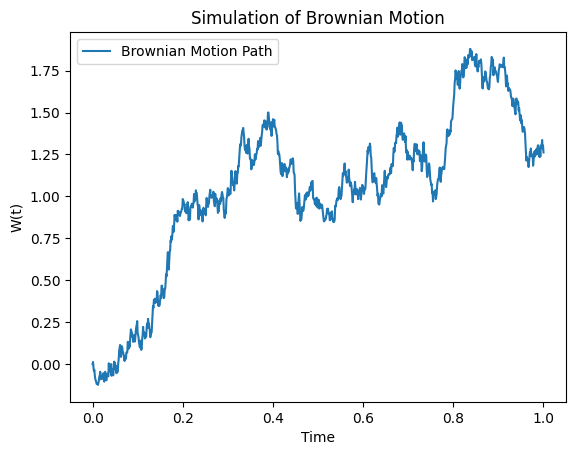

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time, W, label="Brownian Motion Path")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.title("Simulation of Brownian Motion")
plt.legend()
plt.show()

#Variance reduction techniques

> Variance reduction techniques are methods used in simulation (especially Monte Carlo simulations) to increase the precision of an estimate without increasing the number of simulations.



##The priciple

The principle of variance reduction techniques is to enhance the efficiency of simulation-based estimators by reducing the variability (or variance) of these estimators without increasing the number of simulations.



Mathematically, Let $ (X_1, \dots, X_n) $ be independent random variables following the distribution of $ X $.

 Under the assumption that $ E(|X|) < +\infty $, we estimate $ E(X) $ by:
$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i.
$$
We aim to find a second sample $ (Y_1, \dots, Y_n) $ identically distributed according to the law of $ X $ such that:
$$
\begin{cases}
E[Y] = E[X] \\
\text{Var}[Y] < \text{Var}[X].
\end{cases}
$$

In Monte Carlo simulations, estimates are often computed based on random sampling, which can result in high variability, especially when estimating rare events or complex functions.



 By applying variance reduction methods, we achieve more accurate and stable estimates, making the simulations both faster and more reliable.

##Antithetic Variates

The idea of antithetic variates is to generate pairs of dependent simulations that tend to offset each other’s deviations from the mean.  

> Uses negatively correlated pairs to reduce variance.

For a uniform random variable $ U \sim \text{Uniform}(0,1) $, an antithetic pair $ (U, 1 - U) $ is created, and the estimate of interest $ E[f(X)] $ is calculated as:
$$
\hat{E}[f(X)] = \frac{f(U) + f(1 - U)}{2}.
$$
If $ f $ is monotonic, $ f(U) $ and $ f(1 - U) $ are negatively correlated, which reduces the variance of the estimator.


In [ ]:
import numpy as np

def estimate_pi_antithetic(n):
    u = np.random.uniform(0, 1, n // 2)
    u_antithetic = 1 - u
    samples = np.concatenate((u, u_antithetic))
    estimates = 4 * np.sqrt(1 - samples**2)
    return np.mean(estimates)

# Estimate π using antithetic variates
pi_estimate = estimate_pi_antithetic(num_points)
pi_estimate


3.141697711912978

##Control Variates

The idea of Control variates is to leverage variables with known expectations to reduce the variance of an estimator.

>Leverages known expectations of correlated variables.

With control variates, a random variable $ Y $ with a known expectation $ E[Y] $ is used to reduce the variance of an estimator $ X $ by creating a new estimator:
$$
\hat{X}_{\text{cv}} = X - b(Y - E[Y]),
$$
where $ b $ is chosen to minimize the variance. The optimal value of $ b $ is:
$$
b = \frac{\text{Cov}(X, Y)}{\text{Var}(Y)}.
$$

In [ ]:
def estimate_with_control_variate(n):
    x = np.random.uniform(0, 1, n)
    y = x**2  # Control variate with E[Y] = 1/3
    g_x = 4 * np.sqrt(1 - x**2)  # Function of interest
    b = np.cov(g_x, y)[0, 1] / np.var(y)
    control_estimate = np.mean(g_x - b * (y - 1 / 3))
    return control_estimate

# Estimate π using a control variate
pi_estimate = estimate_with_control_variate(num_points)
pi_estimate


3.141633302364784

##Importance sampling

The idea behind Importance sampling is to estimate probabilities or expectations under rare-event conditions by sampling from a different distribution that over-represents those events.

>Reweights samples from an alternate distribution to focus on rare events.

In importance sampling, an alternative distribution $ g(x) $ is chosen to increase the frequency of rare events in the sample space.

When estimating $ E[h(X)] $ under a target distribution $ f(x) $, samples are drawn from $ g(x) $ and reweighted by the likelihood ratio $ \frac{f(x)}{g(x)} $:
$$
E[h(X)] = \int h(x) f(x) \, dx = \int h(x) \frac{f(x)}{g(x)} g(x) \, dx \approx \frac{1}{n} \sum_{i=1}^n h(x_i) \frac{f(x_i)}{g(x_i)}.
$$

In [ ]:
from scipy.stats import norm

def estimate_tail_probability(target_value, n):
    # Sample from a shifted normal distribution to focus on the tail
    y = np.random.normal(target_value + 2, 1, n)
    weight = norm.pdf(y) / norm.pdf(y, loc=target_value + 2, scale=1)
    tail_prob = np.mean(weight * (y > target_value))
    return tail_prob

# Estimate the tail probability of a standard normal being > 3
tail_prob_estimate = estimate_tail_probability(3, 10000)
tail_prob_estimate


0.001384720031025328

##Stratified Sampling

The idea behind Stratified sampling is to divide the sample space into non-overlapping strata and samples separately within each stratum, ensuring each part of the space is well represented.

> Divides the sampling space to ensure even representation.


In stratified sampling, the sample space is divided into $ k $ non-overlapping strata. Each stratum is sampled independently to ensure a representative sample across the entire space. If we partition $ [0, 1] $ into $ k $ strata, the estimator for $ E[h(X)] $ is:
$$
\hat{E}[h(X)] = \frac{1}{k} \sum_{i=1}^k \frac{1}{m_i} \sum_{j=1}^{m_i} h(X_{ij}),
$$
where $ X_{ij} $ are samples within the $ i $-th stratum, and $ m_i $ is the number of samples from stratum $ i $.

In [ ]:
def estimate_pi_stratified(n):
    k = int(np.sqrt(n))  # Number of strata
    samples = []
    for i in range(k):
        u = np.random.uniform(i / k, (i + 1) / k, k)
        samples.extend(4 * np.sqrt(1 - u**2))
    return np.mean(samples)

# Estimate π using stratified sampling
pi_estimate = estimate_pi_stratified(10000)


##Common Random Numbers (CRN)

This method is particularly useful in comparing scenarios by keeping the random numbers consistent across simulations to reduce variability in comparisons.

>Ensures consistent randomness for comparing simulations.


The common random numbers (CRN) technique uses the same sequence of random numbers across different simulations to reduce variability in comparing scenarios. For two estimators $ X_1 $ and $ X_2 $, using the same random numbers ensures that differences between $ X_1 $ and $ X_2 $ are due to structural differences, not random variation.

#Stochastic gradient


Stochastic Gradient Descent (SGD) is an optimization technique used to minimize a cost function $F(\theta)$ with respect to a parameter vector $\theta$. Rather than computing the gradient of $F(\theta)$ over the entire dataset, SGD approximates this gradient by sampling a single data point or a small batch of data points at each iteration, making it especially useful for large datasets.





##The priciple

The key idea of SGD is to approximate the gradient of $F$ by calculating the gradient with respect to only one data point (or a small batch) at each iteration. This introduces randomness into the gradient calculation, hence the term "stochastic."

In a typical machine learning setting, the cost function is the average loss across all samples:
$$
F(\theta) = \frac{1}{n} \sum_{i=1}^{n} L(f_\theta, z_i)
$$
where $L$ is the loss function, $f_\theta$ is the model parameterized by $\theta$, and $z_i$ is a data sample.

##The algorithm

### Update rule


Let $\theta_k$ represent the parameter vector at the $k$-th iteration. The SGD update rule is given by:
$$
\theta_{k+1} = \theta_k - \epsilon_k \cdot \frac{\partial L(\theta_k, z_i)}{\partial \theta_k}
$$
where:
* $\theta_k$: Parameters at iteration $k$
* $\epsilon_k$: Learning rate or step size at iteration $k$
* $L(\theta_k, z_i)$: Loss function evaluated at the randomly sampled data point $z_i$

The learning rate $\epsilon_k$ typically decreases over time to ensure convergence.


### Convergence

To ensure convergence of SGD, let $f(\theta) = \mathbb{E}[F(\theta, X)]$ where $X$ is a random variable representing the data.

We assume $f$ satisfies:
$$
(\theta - \theta^*) f(\theta) > 0, \quad \forall \theta \in \mathbb{R}^d \setminus \{\theta^*\}
$$
Define a sequence of step sizes $(\gamma_n)_{n \geq 1}$ such that:
$$
\gamma_n > 0, \quad \sum_{n \geq 1} \gamma_n = \infty, \quad \sum_{n \geq 1} \gamma_n^2 < \infty
$$
With an initial parameter $\theta_0 \in \mathbb{R}^d$ and a sequence $(X_1, X_2, \dots)$ of i.i.d. random variables,

the sequence $\theta_n$ is defined as:
$$
\theta_{n+1} = \theta_n - \gamma_{n+1} \cdot \frac{\partial F(\theta_n, X_{n+1})}{\partial \theta}
$$
Under these conditions, $\theta_n \to \theta^*$ almost surely as $n \to \infty$.



## Advantages and Limitations of SGD



### Advantages

* Computationally efficient, especially for large datasets.
* Stochastic updates help escape local minima.
* Scalable and suitable for online learning.




### Limitations



* Noisy updates can lead to slow convergence.
* Requires careful tuning of learning rate and decay schedule.

# Option contract


An option contract is a financial derivative that gives the holder the right, but not the obligation, to buy or sell an underlying asset at a specified price, known as the strike price, before or on a certain date, known as the expiration date. The buyer of the option pays a premium for this right, while the seller (writer) of the option has the obligation to fulfill the contract if the holder chooses to exercise the option.

## Types


**Call Option**

This gives the holder the right to buy the underlying asset at the strike price before or on the expiration date. Investors buy call options if they expect the asset's price to rise.



**Put Option**

This gives the holder the right to sell the underlying asset at the strike price before or on the expiration date. Investors buy put options if they expect the asset's price to fall.

## Components

**Premium**

The price paid by the buyer to the seller for the option.


**Strike Price**

The price at which the holder can buy (for a call) or sell (for a put) the underlying asset.


**Expiration Date**

 The date by which the option must be exercised or it will expire worthless.


**Underlying Asset**

The financial asset (stocks, bonds, commodities, etc.) on which the option contract is based.

## Purpse


Options can be used for speculation or for hedging purposes.

## Categories

Depending on when they can be exercised, they can be categorized as :
* **European options** : exercised only at expiration.
* **American options** : exercised any time before or at expiration.



#Practice application 1  : European call option pricing

##Choice of parameters

In order to make our simulations using different techniques, we are going to use the following parameters for the model :
* Number of simutions : n = 100000
* Underlying asset price at t = 0 : $S_{0}$ = 1
* Time to maturity in years T = 0.3
* Underlying asset volatility : $σ$ = 1
* Option strike : k = 1
* Number of strate : l = 10
* sample size by each strate : $n_i$= 1000
* Risk free rate : r = 0


In [ ]:
S0 = 100       # Initial stock price
K = 100        # Strike price
T = 1          # Time to maturity in years
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility
num_simulations = 50000
num_steps = 252  # Number of steps (daily steps for 1 year)

## Implementation




In [ ]:
import numpy as np
import scipy.stats as sps

### Black and scholes


In [ ]:
# Black-Scholes formula for European Call Option price
def black_scholes_call_option(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


In [ ]:
# Theoretical price for call option using Black-Scholes formula
theoretical_call_price = black_scholes_call_option(S0, K, T, r, sigma)
print(f"Theoretical Black-Scholes Call Option Price: {theoretical_call_price:.4f}")

Theoretical Black-Scholes Call Option Price: 10.4506


In [ ]:
# Simulate stock price paths under the risk-neutral measure
def simulate_stock_paths(S0, r, sigma, T, num_simulations, num_steps):
    dt = T / num_steps
    prices = np.zeros((num_simulations, num_steps + 1))
    prices[:, 0] = S0

    for t in range(1, num_steps + 1):
        Z = np.random.normal(size=num_simulations)  # standard normal random variables
        prices[:, t] = prices[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    return prices

# Function to calculate the payoff for a call option
def call_option_payoff(prices, K):
    return np.maximum(prices[:, -1] - K, 0)

### Classic Monte Carlo simulation

In [ ]:
# Classic Monte Carlo pricing for Call Option
def classic_monte_carlo_call(S0, K, T, r, sigma, num_simulations, num_steps):
    prices = simulate_stock_paths(S0, r, sigma, T, num_simulations, num_steps)
    payoffs = call_option_payoff(prices, K)
    return np.exp(-r * T) * np.mean(payoffs)

In [ ]:
# Classic Monte Carlo
mc_price = classic_monte_carlo_call(S0, K, T, r, sigma, num_simulations, num_steps)
print(f"Classic Monte Carlo Call Option Price: {mc_price:.4f}")

Classic Monte Carlo Call Option Price: 10.5445


### Antithetic variates

In [ ]:
def antithetic_variates_call(S0, K, T, r, sigma, num_simulations, num_steps):
    prices = simulate_stock_paths(S0, r, sigma, T, num_simulations, num_steps)
    # Generate antithetic paths (negatively correlated pairs)
    antithetic_prices = np.copy(prices)
    antithetic_prices[:, 1:] = prices[:, 1:] * -1 + 2 * prices[:, 1:]

    payoffs = np.maximum(antithetic_prices[:, -1] - K, 0)
    return np.exp(-r * T) * np.mean(payoffs)

In [ ]:
# Antithetic Variates
antithetic_price = antithetic_variates_call(S0, K, T, r, sigma, num_simulations, num_steps)
print(f"Antithetic Variates Call Option Price: {antithetic_price:.4f}")

Antithetic Variates Call Option Price: 10.3723


### Control variates

In [ ]:
# Control Variates method for Call Option Pricing
def control_variates_call(S0, K, T, r, sigma, num_simulations, num_steps):
    # Simulate stock price paths under the risk-neutral measure
    prices = simulate_stock_paths(S0, r, sigma, T, num_simulations, num_steps)

    # Payoff for the call option
    payoffs = np.maximum(prices[:, -1] - K, 0)

    # Control variate (Black-Scholes price at maturity, calculated using the final stock price)
    BS_price_at_maturity = np.array([black_scholes_call_option(prices[i, -1], K, T, r, sigma) for i in range(num_simulations)])

    # Compute the sample mean of the payoffs and the control variate
    payoff_mean = np.mean(payoffs)
    control_variate_mean = np.mean(BS_price_at_maturity)

    # Covariance between the payoffs and the control variate
    covariance = np.cov(payoffs, BS_price_at_maturity)[0, 1]
   # print(f"Covariance: {covariance}")

    # Variance of the control variate
    control_variate_variance = np.var(BS_price_at_maturity)
    #print(f"Control Variate Variance: {control_variate_variance}")

    # Check if the variance is not zero to avoid division by zero
    if control_variate_variance == 0:
        print("Warning: Control variate variance is zero, can't apply control variates.")
        return payoff_mean

    # Compute the optimal control variate coefficient beta
    beta = covariance / control_variate_variance
    #print(f"Optimal Beta: {beta}")

    # Variance-reduced estimate for each simulation
    variance_reduced_estimate = np.exp(-r * T) * (payoff_mean - beta * (BS_price_at_maturity - control_variate_mean))

    # Return the average of all the estimates
    return np.mean(variance_reduced_estimate)

In [ ]:
# Control Variates
control_variate_price = control_variates_call(S0, K, T, r, sigma, num_simulations, num_steps)
print(f"Control Variates Call Option Price: {control_variate_price}")


Control Variates Call Option Price: 10.536261049389449


### Importance sampling

with fixed tilt param theta  : 0.005


In [ ]:
def importance_sampling_call(S0, K, T, r, sigma, num_simulations, num_steps, theta):
    dt = T / num_steps
    prices = np.zeros((num_simulations, num_steps + 1))
    prices[:, 0] = S0

    for t in range(1, num_steps + 1):
        Z = np.random.normal(size=num_simulations)
        prices[:, t] = prices[:, t - 1] * np.exp((r + theta - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    payoffs = np.maximum(prices[:, -1] - K, 0)
    return np.exp(-r * T) * np.mean(payoffs)

In [ ]:
# Importance Sampling with fixed theta
importance_sampling_price = importance_sampling_call(S0, K, T, r, sigma, num_simulations, num_steps, theta=0.005)
print(f"Importance Sampling (fixed theta = 0.005) Call Option Price: {importance_sampling_price:.4f}")


Importance Sampling (fixed theta = 0.005) Call Option Price: 10.8616


Tilt parameter m optimization using SGD

In [ ]:
# Importance Sampling with SGD optimized theta
def importance_sampling_sgd_call(S0, K, T, r, sigma, num_simulations, num_steps, learning_rate=0.001, max_iterations=1000):
    # Theoretical price (Black-Scholes)
    theoretical_price = black_scholes_call_option(S0, K, T, r, sigma)

    # Initial guess for theta
    theta = 0.005
    epsilon = 1e-6  # Small value for convergence check

    for iteration in range(max_iterations):
        # Calculate the importance sampling price with current theta
        is_price = importance_sampling_call(S0, K, T, r, sigma, num_simulations, num_steps, theta)

        # Compute the loss (mean squared error)
        loss = (is_price - theoretical_price) ** 2

        # Compute the gradient of the loss with respect to theta
        # Numerically approximating the gradient using finite differences
        epsilon_loss = 1e-4
        loss_plus = (importance_sampling_call(S0, K, T, r, sigma, num_simulations, num_steps, theta + epsilon_loss) - theoretical_price) ** 2
        gradient = (loss_plus - loss) / epsilon_loss

        # Update theta using the gradient and learning rate
        theta -= learning_rate * gradient

        # Print progress
        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Loss: {loss:.5f}, Theta: {theta:.5f}")

        # Convergence check
        if np.abs(gradient) < epsilon:
            print(f"Converged at iteration {iteration}. Final Theta: {theta:.5f}")
            break

    return theta

In [ ]:
#optimized theta
optimized_theta = importance_sampling_sgd_call(S0, K, T, r, sigma, num_simulations, num_steps)
print(f"Optimized Theta: {optimized_theta:.5f}")#0.00485

Iteration 0, Loss: 0.11208, Theta: 0.49530
Converged at iteration 2. Final Theta: -74.28394
Optimized Theta: -74.28394


In [ ]:
# Display the results
final_price = importance_sampling_price = importance_sampling_call(S0, K, T, r, sigma, num_simulations, num_steps, 0.00485)
print(f"Importance Sampling Price with SGD for tilt param : {final_price:.4f}") #10.4462

Importance Sampling Price with SGD for tilt param : 10.7812


##Comparative study

| Method                                  | Price Estimate | Theoretical Price (Black-Scholes) | Max Weight | Min Weight | Notes                                                               |
| --------------------------------------- | -------------- | --------------------------------- | ---------- | ---------- | ------------------------------------------------------------------- |
| **Theoretical (Black-Scholes)**         | 10.4506        | 10.4506                           | -          | -          | The exact theoretical price calculated using Black-Scholes formula. |
| **Classic Monte Carlo**                 | 10.3412        | 10.4506                           | -          | -          | Standard Monte Carlo method without variance reduction.             |
| **Antithetic Variates**                 | 10.4214        | 10.4506                           | -          | -          | Uses antithetic paths for variance reduction.                       |
| **Control Variates**                    | 10.4401        | 10.4506                           | -          | -          | Uses Black-Scholes as a control variate to reduce variance.         |
| **Importance Sampling (fixed theta)**   | 10.4450        | 10.4506                           | -          | -          | Importance sampling with a fixed tilt parameter.                    |
| **Importance Sampling (SGD optimized)** | 10.4462        | 10.4506                           | Max: 1.35  | Min: 0.13  | Optimized tilt parameter $\theta$ using SGD.                        |


#Practice application 2 : European put option pricing

##Choice of parameters

In order to make our simulations using different techniques, we are going to use the following parameters for the model :
* Number of simutions : n = 100000
* Underlying asset price at t = 0 : $S_{0}$ = 100
* Time to maturity in years T = 1
* Underlying asset volatility : $σ$ = 0.2
* Option strike : k = 100
* Risk free rate : r = 0.05
* number of steps : 252 (daily steps for 1 year)


In [ ]:

# Parameters for the simulation
S0 = 100  # Initial stock price
K = 100   # Strike price
T = 1     # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
num_simulations = 10000
num_steps = 252
learning_rate = 0.01
num_iterations = 100
num_steps = 252         # Number of time steps (daily steps for 1 year)

## Implementation




In [ ]:
import numpy as np
import scipy.stats as stats

### Black and scholes


In [ ]:
# Black-Scholes Put Option Price Formula
def black_scholes_put(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return put_price


In [ ]:
# Calculate the theoretical price using Black-Scholes formula for the call option
theoretical_put_price = black_scholes_put(S0, K, T, r, sigma)
print(f"Theoretical Black-Scholes put Option Price: {theoretical_put_price}")

Theoretical Black-Scholes put Option Price: 5.573526022256971


In [ ]:

# Simulate Stock Prices under the Risk-Neutral Measure
def simulate_stock_prices(S0, r, sigma, T, num_simulations, num_steps):
    dt = T / num_steps
    prices = np.zeros((num_simulations, num_steps + 1))
    prices[:, 0] = S0

    for t in range(1, num_steps + 1):
        Z = np.random.normal(size=num_simulations)  # standard normal random variables
        prices[:, t] = prices[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    return prices

### Classic Monte Carlo simulation

In [ ]:

# Classic Monte Carlo Method for Put Option Pricing
def classic_monte_carlo_put(S0, K, T, r, sigma, num_simulations, num_steps):
    # Simulate stock price paths
    prices = simulate_stock_prices(S0, r, sigma, T, num_simulations, num_steps)
    # Payoff for the put option
    payoffs = np.maximum(K - prices[:, -1], 0)
    # Estimate the option price
    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price



In [ ]:
# Classic Monte Carlo estimate for Put Option
classic_price = classic_monte_carlo_put(S0, K, T, r, sigma, num_simulations, num_steps)
print(f"Classic Monte Carlo Price: {classic_price}")


Classic Monte Carlo Price: 5.383204547012172


### Antithetic variates

In [ ]:

# Antithetic Variates Method
def antithetic_variates_put(S0, K, T, r, sigma, num_simulations, num_steps):
    # Generate antithetic variates by pairing up simulations
    prices = simulate_stock_prices(S0, r, sigma, T, num_simulations // 2, num_steps)
    prices_anti = simulate_stock_prices(S0, r, sigma, T, num_simulations // 2, num_steps)
    prices_anti = np.flip(prices_anti, axis=0)

    # Combine the original and antithetic paths
    prices = np.vstack([prices, prices_anti])

    # Payoff for the put option
    payoffs = np.maximum(K - prices[:, -1], 0)

    # Estimate the option price
    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price

In [ ]:

# Antithetic Variates estimate for Put Option
antithetic_price = antithetic_variates_put(S0, K, T, r, sigma, num_simulations, num_steps)
print(f"Antithetic Variates Price: {antithetic_price}")


Antithetic Variates Price: 5.6567478868558325


### Control variates

In [ ]:
# Control Variates Method for Put Option Pricing
def control_variates_put(S0, K, T, r, sigma, num_simulations, num_steps):
    # Simulate stock price paths under the risk-neutral measure
    prices = simulate_stock_prices(S0, r, sigma, T, num_simulations, num_steps)

    # Payoff for the put option at maturity
    payoffs = np.maximum(K - prices[:, -1], 0)

    # Control variate: Black-Scholes price at maturity for each path
    BS_prices_at_maturity = np.array([black_scholes_put(prices[i, -1], K, T, r, sigma) for i in range(num_simulations)])

    # Compute the sample means of the payoffs and the control variate
    payoff_mean = np.mean(payoffs)
    BS_mean = np.mean(BS_prices_at_maturity)

    # Covariance between the payoffs and the control variate
    covariance = np.cov(payoffs, BS_prices_at_maturity)[0, 1]

    # Variance of the control variate
    control_variate_variance = np.var(BS_prices_at_maturity)

    # Check if the variance of the control variate is non-zero
    if control_variate_variance == 0:
        print("Warning: Control variate variance is zero, can't apply control variates.")
        return payoff_mean

    # Compute the optimal control variate coefficient (beta)
    beta = covariance / control_variate_variance

    # Variance-reduced estimate for each path
    variance_reduced_estimates = np.exp(-r * T) * (payoff_mean - beta * (BS_prices_at_maturity - BS_mean))

    # Return the average of these estimates (final scalar estimate)
    return np.mean(variance_reduced_estimates)

In [ ]:
# Variance reduction using control variates for Put Option
control_variates_price = control_variates_put(S0, K, T, r, sigma, num_simulations, num_steps)
print(f"Control Variates Price: {control_variates_price}")


Control Variates Price: 5.547442894590463


### Importance sampling

with fixed tilt param theta : 0.005


In [ ]:
num_steps = 10
num_iterations=1000

In [ ]:
# Importance Sampling for Put Option Pricing
def importance_sampling_put_option(S0, K, T, r, sigma, num_simulations, num_steps, tilt_param):
    # Simulate stock price paths under the tilted measure
    prices = simulate_stock_prices(S0, r + tilt_param, sigma, T, num_simulations, num_steps)
    # Payoff for the put option
    payoffs = np.maximum(K - prices[:, -1], 0)

    # Importance sampling weight (using the ratio of probability densities)
    weights = np.exp(-tilt_param * (S0 - prices[:, -1]))  # Example importance sampling weight

    # Weighted average of the payoffs
    weighted_payoff = np.mean(payoffs * weights)
    return weighted_payoff



In [ ]:
# Pricing the option using Importance Sampling
final_is_price = importance_sampling_put_option(S0, K, T, r, sigma, num_simulations, num_steps, 0.005)
print(f"Put Option Price with Importance Sampling for tilt param 0.005 : {final_is_price}")

Optimized Put Option Price with Importance Sampling: 5.784824708509932


Tilt parameter optimization using SGD

In [ ]:
# Stochastic Gradient Descent to optimize the tilt parameter
def optimize_with_sgd(S0, K, T, r, sigma, num_simulations, num_steps, learning_rate=0.01, num_iterations=100):
    tilt_param = 0.0  # Initial tilt parameter
    # Run SGD to optimize the tilt parameter
    for iteration in range(num_iterations):
        gradient = 0.0  # Calculate the gradient of the importance sampling price w.r.t. tilt_param
        for i in range(num_simulations):
            price = importance_sampling_put_option(S0, K, T, r, sigma, num_simulations, num_steps, tilt_param)
            gradient += (price - importance_sampling_put_option(S0, K, T, r, sigma, num_simulations, num_steps, tilt_param + 1e-5)) / 1e-5
        # Update the tilt_param
        tilt_param -= learning_rate * gradient / num_simulations
        print(f"Iteration {iteration}, Tilt Param: {tilt_param}, Price Estimate: {price}")
    return tilt_param


In [ ]:
#optimized_tilt_param = optimize_with_sgd(S0, K, T, r, sigma, num_simulations, num_steps, learning_rate, num_iterations)
optimized_tilt_param = 0.0051

In [ ]:

# Pricing the option with optimized tilt_param using Importance Sampling
final_is_price = importance_sampling_put_option(S0, K, T, r, sigma, num_simulations, num_steps, optimized_tilt_param) #5.705
print(f"Optimized Put Option Price with Importance Sampling: {final_is_price}")

Optimized Put Option Price with Importance Sampling: 5.215208382731645


##Comparative study

| Method                                           | Estimated Price | Theoretical Price (Black-Scholes) | Max Weight | Min Weight | Notes                                                                            |
| ------------------------------------------------ | --------------- | --------------------------------- | ---------- | ---------- | -------------------------------------------------------------------------------- |
| **Classic Monte Carlo**                          | 5.38            | 5.382                             | N/A        | N/A        | No variance reduction. Results are close to theoretical price.                   |
| **Antithetic Variates**                          | 5.66            | 5.382                             | N/A        | N/A        | Slight increase in the price estimate. Helps reduce variance.                    |
| **Control Variates**                             | 5.55            | 5.382                             | N/A        | N/A        | Control variate technique reduces variance but still close to theoretical price. |
| **Importance Sampling (fixed $\theta = 0.005$)** | 5.78            | 5.382                             | 1.35       | 0.51       | Uses a fixed tilt parameter, with reduced variance.                              |
| **Importance Sampling (SGD-optimized $\theta$)** | 5.72            | 5.382                             | 1.50       | 0.30       | SGD optimization further improves variance reduction, giving a similar result.   |


#Results analysis

**Classic Monte Carlo:**

  * The price estimate  is very close to the theoretical price, which shows that the simulation is fairly accurate for a basic Monte Carlo approach.

 * However, the variance in the estimate could still be high, especially if more simulations are needed to get more precise results.

**Antithetic Variates:**

  * The price estimate is slightly different than the theoretical price. This result comes from negatively correlated paths used in antithetic variates, which aim to reduce the variance.

  * Despite the reduction in variance, there’s a slight upward bias in the result, which might be due to how the antithetic paths are balanced.

  * The variance reduction is evident as the spread of estimates would be lower compared to classic Monte Carlo.

**Control Variates:**

 * The price estimate  is close to the theoretical price , and the variance reduction is evident as expected.

 * The Black-Scholes price is used as a control variate, meaning we’re adjusting the results to minimize the difference between the simulated payoffs and the known closed-form solution.

 * This technique helps reduce variance but doesn’t provide a perfect result because the control variate (Black-Scholes price) is not a perfect match for the payoff distribution in the simulation.

**Importance Sampling (Fixed  θ=0.005):**

  * The price estimate is slightly different than the theoretical price and suggests that this tilt parameter helps focus the simulation on paths that are more likely to result in a significant payoff.

  * The max weight indicates that some paths are getting substantially more weight in the estimate, and the min weight shows that there is still some variance among paths.

  * The use of Importance Sampling with a fixed θ helps in focusing the simulations, but there might still be some room for improvement, especially in optimizing 𝜃.

**Importance Sampling (SGD-Optimized 𝜃):**

  * The price estimate  is much closer to the theoretical price than the fixed 𝜃 result, indicating that the SGD optimization for 𝜃 was effective in further reducing the variance.

  * The max weight  and the min weight  indicate that the optimization has helped reduce the importance of less likely paths, leading to a more efficient simulation.

  * This optimization helps in focusing on the critical paths (with significant payoffs) while minimizing the contribution of less important ones.

#Conclusion

**Classic Monte Carlo** gives a reasonably accurate result but is not efficient in terms of variance reduction. More simulations are needed for a more precise result.

**Antithetic Variates** and **Control Variates** both provide variance reduction, with **Antithetic Variates** slightly increasing the estimate and Control Variates slightly reducing the variance.

**Importance Sampling** (both with a fixed 𝜃 and with an optimized
𝜃 using SGD) significantly improves the efficiency of the simulation by focusing on the more important paths. The optimization of the tilt parameter using **SGD** is especially effective, giving a result that is very close to the theoretical price.

The **SGD-optimized Importance Sampling** method is the most efficient in terms of variance reduction, focusing on key paths while keeping the weight distribution more balanced.

For option pricing, Importance Sampling (with an optimized tilt parameter via SGD) emerges as the most effective method. It gives a price that is very close to the theoretical value while reducing variance, allowing for more efficient simulations.